In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # создает многослойную нс
from tensorflow.keras.layers import Dense # полносвязный слой нс
from tensorflow import keras

import tensorflow as tf
tf.config.run_functions_eagerly(True)

2022-11-12 16:03:39.562413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-12 16:03:39.655709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-12 16:03:39.655724: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-12 16:03:39.675473: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-12 16:03:40.166036: W tensorflow/stream_executor/platform/de

In [2]:
EPOCHS = 200

In [3]:
a, b = 2, 3
def f(x):
    return math.log(x)-x+1.8

3001
[1.    1.001 1.002 ... 3.998 3.999 4.   ]


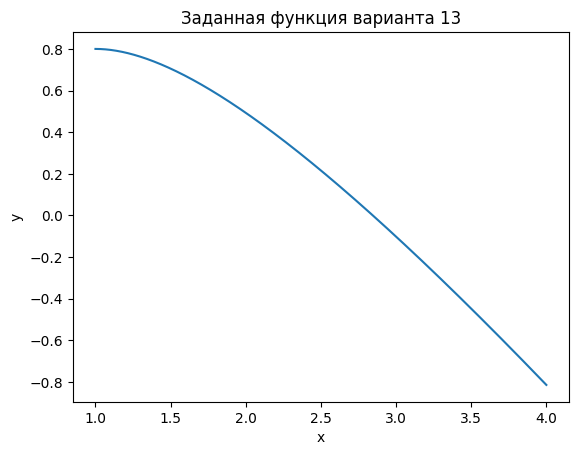

In [4]:
x = np.arange(a - 1, b + 1.001, 0.001)
print(len(x))
print(x)
y = np.array([f(xx) for xx in x])
   
plt.plot(x, y)
  
plt.xlabel('x')
plt.ylabel('y')

plt.title('Заданная функция варианта 13')

plt.show()

In [5]:
train_step = 0.001
x_train = np.arange(train_step, b + 3 + train_step, train_step)
print(f'x_train: {x_train} with len = {len(x_train)}')
y_train = np.array([f(xx) for xx in x_train])
print(f'y_train: {y_train} with len = {len(y_train)}')

x_train: [1.000e-03 2.000e-03 3.000e-03 ... 5.998e+00 5.999e+00 6.000e+00] with len = 6000
y_train: [-5.10875528 -4.4166081  -4.01214299 ... -2.40657392 -2.40740721
 -2.40824053] with len = 6000


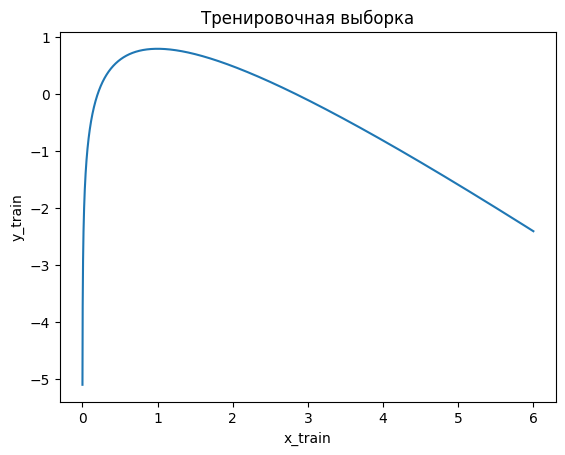

In [6]:
plt.plot(x_train, y_train)
  
plt.xlabel('x_train')
plt.ylabel('y_train')

plt.title('Тренировочная выборка')

plt.show()

In [7]:
test_step = 0.01
test_shift = 0.5
x_test = np.arange(a - test_shift, b + test_shift + test_step, test_step)
print(f'x_test: {x_test} with len = {len(x_test)}')
y_test = np.array([f(xx) for xx in x_test])
print(f'y_test: {y_test} with len = {len(y_test)}')

x_test: [1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63
 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77
 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91
 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05
 2.06 2.07 2.08 2.09 2.1  2.11 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19
 2.2  2.21 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33
 2.34 2.35 2.36 2.37 2.38 2.39 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47
 2.48 2.49 2.5  2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61
 2.62 2.63 2.64 2.65 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75
 2.76 2.77 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89
 2.9  2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03
 3.04 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17
 3.18 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31
 3.32 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.4

# Early Stopping

In [8]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.001, patience=20, verbose=1),
]

# 1 архитектура (простая)

In [9]:
model = Sequential(
    [
        Dense(8, activation="relu", input_shape=(1,), name="hidden_dense_1"),
        Dense(1, activation='linear', name="output"),
    ]
)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

2022-11-12 16:03:42.447245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-12 16:03:42.450408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-12 16:03:42.450463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-12 16:03:42.450503: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-12 16:03:42.450541: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [10]:
%%time
history = model.fit(x_train, y_train, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/200
  1/188 [..............................] - ETA: 9s - loss: 2.1892 - mse: 2.1892

/home/mrx/.local/share/virtualenvs/lab4-gbsP5jFt/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 [==============================] - 2s 10ms/step - loss: 0.9654 - mse: 0.9654
Epoch 2/200
188/188 [==============================] - 2s 10ms/step - loss: 0.5990 - mse: 0.5990
Epoch 3/200
188/188 [==============================] - 2s 10ms/step - loss: 0.4562 - mse: 0.4562
Epoch 4/200
188/188 [==============================] - 2s 10ms/step - loss: 0.3405 - mse: 0.3405
Epoch 5/200
188/188 [==============================] - 2s 11ms/step - loss: 0.2565 - mse: 0.2565
Epoch 6/200
188/188 [==============================] - 2s 11ms/step - loss: 0.2004 - mse: 0.2004
Epoch 7/200
188/188 [==============================] - 2s 11ms/step - loss: 0.1654 - mse: 0.1654
Epoch 8/200
188/188 [==============================] - 2s 10ms/step - loss: 0.1446 - mse: 0.1446
Epoch 9/200
188/188 [==============================] - 2s 10ms/step - loss: 0.1320 - mse: 0.1320
Epoch 10/200
188/188 [==============================] - 2s 10ms/step - loss: 0.1237 - mse: 0.1237
Epoch 11/200
188/188 [===================

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_dense_1 (Dense)      (None, 8)                 16        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


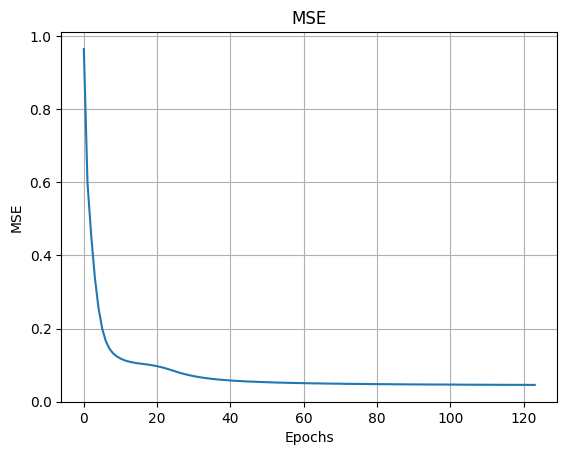

In [12]:
plt.plot(history.history['loss'])
plt.grid(True)

plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.title('MSE')

plt.show()

In [13]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

7/7 [==============================] - 0s 2ms/step
0.010542151844778065


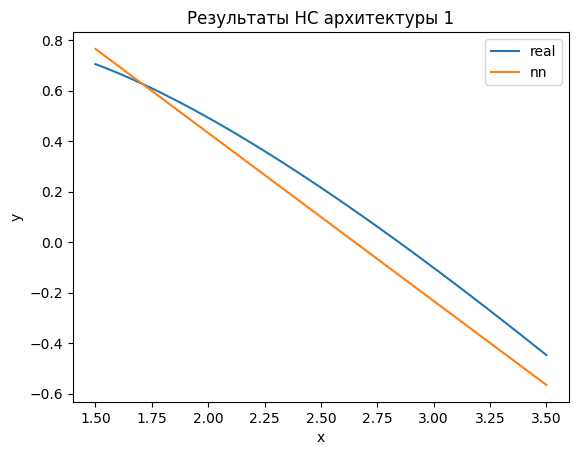

In [14]:
plt.plot(x_test, y_test, label='real')
plt.plot(x_test, y_pred, label='nn')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Результаты НС архитектуры 1')

plt.legend()
plt.show()

# 2 архитектура

In [15]:
model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(1,), name="hidden_dense_1"),
        Dense(32, activation="tanh", name="hidden_dense_2"),
        Dense(16, activation="relu", name="hidden_dense_3"),
        Dense(8, activation="tanh", name="hidden_dense_4"),
        Dense(1, activation='linear', name="output"),
    ]
)
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [16]:
%%time
history = model.fit(x_train, y_train, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/200
  5/188 [..............................] - ETA: 3s - loss: 1.1109 - mse: 1.1109

/home/mrx/.local/share/virtualenvs/lab4-gbsP5jFt/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 [==============================] - 3s 13ms/step - loss: 0.2115 - mse: 0.2115
Epoch 2/200
188/188 [==============================] - 3s 14ms/step - loss: 0.0558 - mse: 0.0558
Epoch 3/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0475 - mse: 0.0475
Epoch 4/200
188/188 [==============================] - 3s 13ms/step - loss: 0.0489 - mse: 0.0489
Epoch 5/200
188/188 [==============================] - 3s 13ms/step - loss: 0.0388 - mse: 0.0388
Epoch 6/200
188/188 [==============================] - 3s 14ms/step - loss: 0.0368 - mse: 0.0368
Epoch 7/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0325 - mse: 0.0325
Epoch 8/200
188/188 [==============================] - 3s 14ms/step - loss: 0.0285 - mse: 0.0285
Epoch 9/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0322 - mse: 0.0322
Epoch 10/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0236 - mse: 0.0236
Epoch 11/200
188/188 [===================

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_dense_1 (Dense)      (None, 64)                128       
                                                                 
 hidden_dense_2 (Dense)      (None, 32)                2080      
                                                                 
 hidden_dense_3 (Dense)      (None, 16)                528       
                                                                 
 hidden_dense_4 (Dense)      (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


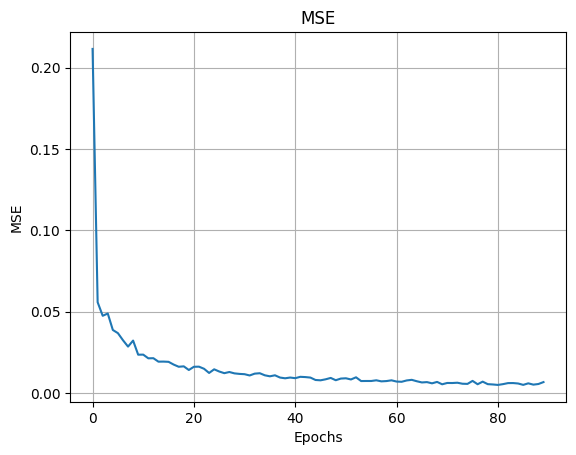

In [18]:
plt.plot(history.history['loss'])
plt.grid(True)

plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.title('MSE')

plt.show()

In [19]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
6.173423955317416e-05


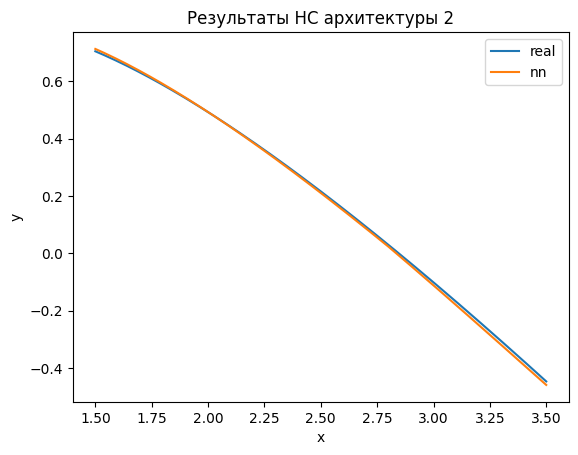

In [20]:
plt.plot(x_test, y_test, label='real')
plt.plot(x_test, y_pred, label='nn')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Результаты НС архитектуры 2')

plt.legend()
plt.show()

# 3 архитектура

In [21]:
model = Sequential(
    [
        Dense(32, activation="relu", input_shape=(1,), kernel_initializer="Orthogonal", name="hidden_dense_1"),
        Dense(64, activation="tanh", kernel_initializer="Orthogonal", name="hidden_dense_2"),
        Dense(32, activation="relu", kernel_initializer="Orthogonal", name="hidden_dense_3"),
        Dense(16, activation="tanh", kernel_initializer="Orthogonal", name="hidden_dense_4"),
        Dense(1, activation='linear', kernel_initializer="Orthogonal", name="output"),
    ]
)
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [22]:
%%time
history = model.fit(x_train, y_train, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/200
  7/188 [>.............................] - ETA: 3s - loss: 1.0477 - mse: 1.0477

/home/mrx/.local/share/virtualenvs/lab4-gbsP5jFt/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 [==============================] - 3s 13ms/step - loss: 0.4174 - mse: 0.4174
Epoch 2/200
188/188 [==============================] - 2s 13ms/step - loss: 0.1004 - mse: 0.1004
Epoch 3/200
188/188 [==============================] - 2s 12ms/step - loss: 0.0779 - mse: 0.0779
Epoch 4/200
188/188 [==============================] - 3s 13ms/step - loss: 0.0652 - mse: 0.0652
Epoch 5/200
188/188 [==============================] - 3s 14ms/step - loss: 0.0544 - mse: 0.0544
Epoch 6/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0460 - mse: 0.0460
Epoch 7/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0410 - mse: 0.0410
Epoch 8/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0444 - mse: 0.0444
Epoch 9/200
188/188 [==============================] - 3s 14ms/step - loss: 0.0382 - mse: 0.0382
Epoch 10/200
188/188 [==============================] - 2s 13ms/step - loss: 0.0416 - mse: 0.0416
Epoch 11/200
188/188 [===================

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_dense_1 (Dense)      (None, 32)                64        
                                                                 
 hidden_dense_2 (Dense)      (None, 64)                2112      
                                                                 
 hidden_dense_3 (Dense)      (None, 32)                2080      
                                                                 
 hidden_dense_4 (Dense)      (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


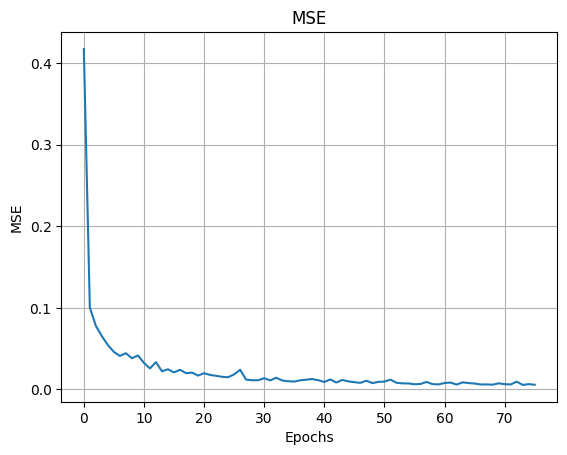

In [24]:
plt.plot(history.history['loss'])
plt.grid(True)

plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.title('MSE')

plt.show()

In [25]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
0.00018425139770495365


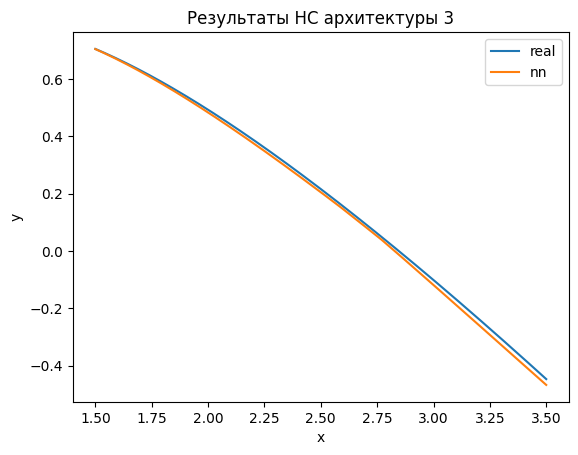

In [26]:
plt.plot(x_test, y_test, label='real')
plt.plot(x_test, y_pred, label='nn')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Результаты НС архитектуры 3')

plt.legend()
plt.show()